# Pyber Ride Sharing
----

### Analysis
* Roughly 70% of all rides and total fare value come from Urban riders.
* Rural riders tend to take significantly higher cost, albeit fewer, trips than Urban or Suburban riders.
* While comprising of roughly 35% of all rides and fares, Suburban and Rural cities afford only 22% of Pyber's total driver population. There may be a strategic opportunity here to boost driver counts in these regions to enhance market share.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "raw_data/city_data.csv"
ride_data_to_load = "raw_data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
city_ride_data.head()

city                 date   fare        ride_id  driver_count   type
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038            46  Urban
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942            35  Urban
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587            55  Urban
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892            68  Urban
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673             8  Urban

In [5]:
ride_data.head()

city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673

In [4]:
city_data.head()

city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban

## Bubble Plot of Ride Sharing Data

In [6]:
city_ride_data["type"] == "Urban"

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2377    False
2378    False
2379    False
2380    False
2381    False
2382    False
2383    False
2384    False
2385    False
2386    False
2387    False
2388    False
2389    False
2390    False
2391    False
2392    False
2393    False
2394    False
2395    False
2396    False
2397    False
2398    False
2399    False
2400    False
2401    False
2402    False
2403    False
2404    False
2405    False
2406    False
Name: type, Length: 2407, dtype: bool

In [7]:
city_ride_data[city_ride_data["type"] == "Urban"]

city                 date   fare        ride_id  \
0             Sarabury  2016-01-16 13:49:27  38.35  5403689035038   
1            South Roy  2016-01-02 18:42:34  17.49  4036272335942   
2          Wiseborough  2016-01-21 17:35:29  44.18  3645042422587   
3          Spencertown  2016-07-31 14:53:22   6.87  2242596575892   
4           Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673   
5          New Jeffrey  2016-02-22 18:36:25  36.01  9757888452346   
6        Port Johnstad  2016-06-07 02:39:58  17.15  4352278259335   
7            Jacobfort  2016-09-20 20:58:37  22.98  1500221409082   
8          Travisville  2016-01-15 17:32:02  27.39   850152768361   
9           Sandymouth  2016-11-16 07:27:00  21.61  2389035050524   
10     New Andreamouth  2016-04-11 07:20:48   7.72  9992929847990   
11       New Christine  2016-09-13 15:06:42  24.89  7918411468537   
12         Stewartview  2016-03-29 05:15:56  23.88  6778235889588   
13      Rodriguezburgh  2016-09-05 05:20:39   4.54  9650770953139   
14    West Sydneyhaven  2016-08-02 21:18:44  12.87  7994760397230   
15         Swansonbury  2016-07-11 18:42:11  39.30   744481862626   
16            Lisatown  2016-07-05 18:09:14   5.82  6370359473201   
17           East Erin  2016-11-03 01:03:05   7.51  4744239092530   
18     Port Martinberg  2016-01-06 17:11:30   8.66  7298562820881   
19         Wiseborough  2016-09-12 18:43:41  26.83  9304728540000   
20         Edwardsbury  2016-02-27 03:55:54  20.17  8514523868075   
21           Jacobfort  2016-06-12 17:01:29  34.47  4135673527977   
22         Pamelahaven  2016-03-26 12:56:57  36.43  3015329826849   
23          Fosterside  2016-08-12 11:52:41  28.08   133077693483   
24           Jacobfort  2016-09-17 12:38:58  38.25  2182376146051   
25    West Sydneyhaven  2016-08-23 14:49:59  36.12  5885997568611   
26         West Alexis  2016-01-16 00:33:02  26.62  1574788996743   
27         Carrollfort  2016-06-24 20:11:11   6.45  1092683495142   
28           New David  2016-01-12 20:48:43  38.68  5229089333754   
29         Stewartview  2016-10-15 05:26:40  11.74  8402784599831   
...                ...                  ...    ...            ...   
1595         East Erin  2016-05-18 20:48:05  12.13  1266215264012   
1596     Port Johnstad  2016-11-01 20:52:15  41.09  9067296393743   
1597   South Bryanstad  2016-09-16 09:02:02  25.82  5264899878521   
1598     Lake Jennaton  2016-09-03 07:14:23   8.89  6023947302499   
1599         New Aaron  2016-06-27 11:28:34  37.02  5355985559469   
1600          Lisatown  2016-04-13 10:09:58  12.20  6017161751300   
1601       South Louis  2016-07-15 07:48:18  24.84  4997876249830   
1602      Alvarezhaven  2016-01-27 10:38:40   6.72  6152998520191   
1603  West Jefferyfurt  2016-07-23 13:10:00  24.40  6114053475907   
1604  West Jefferyfurt  2016-02-03 00:54:14   5.80  4393925880724   
1605       Stewartview  2016-10-10 06:20:58  13.90  4005866140934   
1606  West Brittanyton  2016-07-07 13:33:03  24.27  9330634223713   
1607       Spencertown  2016-11-22 10:05:47   4.79  2729162668443   
1608       New Jeffrey  2016-09-22 23:52:38  21.44  8763732577685   
1609         New Aaron  2016-09-30 09:45:03  35.26  4769926083028   
1610   South Bryanstad  2016-11-16 22:51:16  13.58  3696811450171   
1611         Davidtown  2016-04-12 21:45:55  30.19  9023918750752   
1612         Prattfurt  2016-08-05 20:08:15  32.12  4506575381521   
1613       West Alexis  2016-11-06 19:02:42  29.01  4924471900019   
1614          Sarabury  2016-04-06 21:02:54   7.14  6096364843852   
1615      Antoniomouth  2016-03-09 08:07:17  31.20  1712057358094   
1616       West Brandy  2016-03-23 07:35:25  38.48  1506716802765   
1617        Fosterside  2016-12-04 21:31:45  21.49  5128740240083   
1618       South Louis  2016-11-22 15:34:11  35.27  3627438789238   
1619          Eriktown  2016-09-06 07:01:34  41.11  8990582387342   
1620      Alvarezhaven  2016-07-04 04:28:22  33.31   306054352684   
1621         New

In [12]:
# Obtain the x and y coordinates for each of the three city types
# city_ride_data["type"] == "Urban"
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]

urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
# urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

# suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
# suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
# suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

# rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
# rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
# rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

city
Alvarezhaven         23.928710
Alyssaberg           20.609615
Antoniomouth         23.625000
Aprilchester         21.981579
Arnoldview           25.106452
Carrollfort          25.395517
Davidtown            22.978095
Davistown            21.497200
East Douglas         26.169091
East Erin            24.478214
Edwardsbury          26.876667
Eriktown             25.478947
Fosterside           23.034583
Jacobfort            24.779355
Kellershire          24.169474
Kelseyland           21.806429
Kimberlychester      22.947037
Lake Jeffreyland     27.334800
Lake Jennaton        25.349600
Lake Sarashire       26.610000
Lake Stevenbury      24.657619
Lisatown             22.225217
Lisaville            28.428929
Maryside             26.844286
Mooreview            29.520476
New Aaron            26.861818
New Andreamouth      24.966786
New Christine        24.157727
New David            27.084286
New Jeffrey          24.130000
                       ...    
Port Martinberg      22.329524
Por

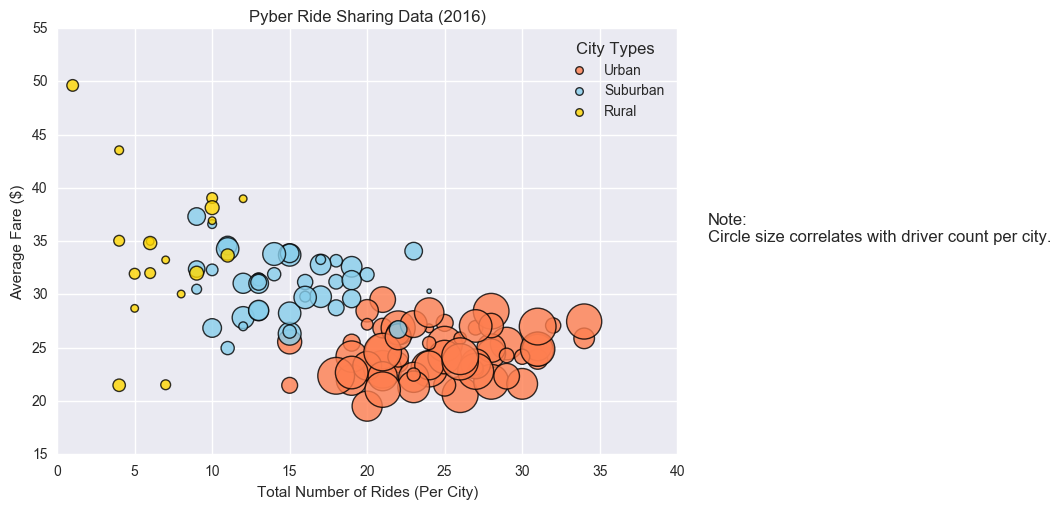

In [3]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("analysis/Fig1.png")

# Show plot
plt.show()

## Total Fares by City Type

In [4]:
# Calculate Type Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("analysis/Fig2.png")

# Show Figure
plt.show()

## Total Rides by City Type

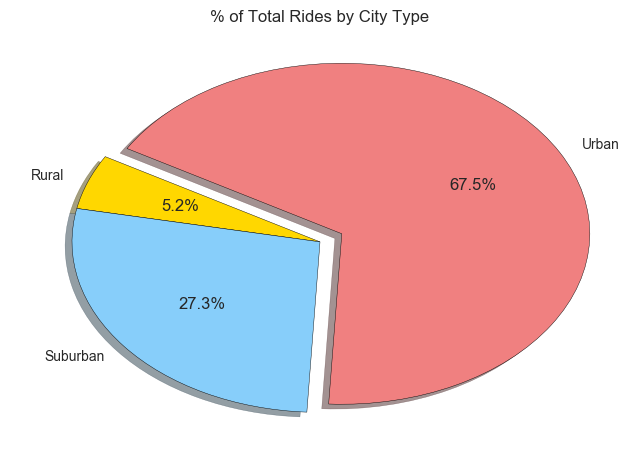

In [5]:
# Calculate Ride Percents
ride_percents = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("analysis/Fig3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

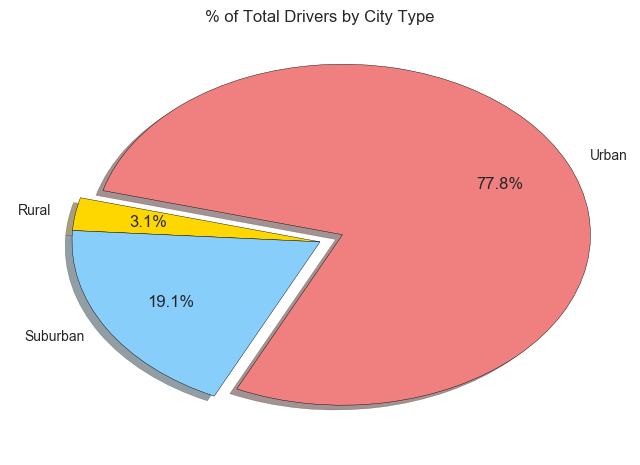

In [6]:
# Calculate Driver Percents
driver_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("analysis/Fig4.png")

# Show Figure
plt.show()